# Imports

In [5]:
!pip install palmerpenguins

In [2]:
#Two Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns


#Mathematical libraries
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
#load datasets
!wget https://raw.githubusercontent.com/bharris12/URP_2021_Programming_Course/main/lecture_4/data/iris.csv
from palmerpenguins import load_penguins
iris = pd.read_csv('./iris.csv',index_col=0)
penguins = load_penguins()

In [53]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<img src = 'https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-01-9780128147610.jpg'>

In [51]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


<img src = 'https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png'>
<img src = 'https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png'>

### Principles of Plotting in Python

#### The anatomy of a plot/figure

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" />

<img src="https://matplotlib.org/_images/sphx_glr_anatomy_001.png" />

#### Python plot gallery

Website with lots of different plot types and code, super useful to get ideas and code for plotting

https://python-graph-gallery.com

#### Initializing a figure

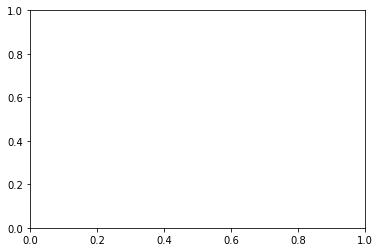

In [20]:
#This creates a new figure adn axes
fig, ax = plt.subplots()

#In general everything you do plotting will be in between these two lines of code

#This shows it
plt.show()

#This saves it, you need to comment out plt.show() and uncomment this, you can't do both
#However when you use plt.savefig() the figure will still appear
#plt.savefig('../figures/emptyfig.pdf') #If you specify a file format it will interpet that

### Python plot gallery

Website with lots of different plot types and code

https://python-graph-gallery.com

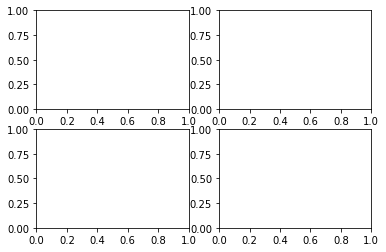

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=2)
plt.show()

In [22]:
print(ax)

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


When you create multiple plots using subplots it is creating a list, so if you want to plot something in one of the axes within the figure you can just index it

In [23]:
fake_data_1 = np.arange(10)
fake_data_2 = np.random.rand(10)
fake_data_3 = np.random.beta(1,.5,size=10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


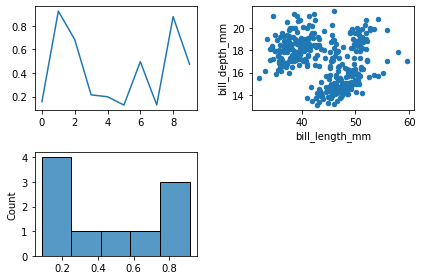

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=2)

#Top Left
ax[0, 0].plot(fake_data_1, fake_data_2)

#Bototm left
sns.histplot(fake_data_3, ax=ax[1, 0])

#Top right
penguins.plot.scatter(x='bill_length_mm', y='bill_depth_mm', ax=ax[0, 1])

#Bottom rigth
ax[1,1].axis('off')

#Uncomment to make pretty (aka properly organize whitespace)
plt.tight_layout()
plt.show()

#### General Aesthetics 

Seaborn is what is known as a **wrapper** of matplotlib. That means that seaborn merely calls functions in matplotlib to produce the figures. It does this because matplotlib is so vast and can be quite cumbersome. Stuff that take a single line of code using seaborn can take many line in base matplotib. 

One way this can be useful is that seaborn has some set styles that change many aspects of the plots, you can change this for your entire notebook or for just one block of code depending on how you set it

In [25]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)


The figure on the left has the style set to whitegrid because it is inside the with statement, while the one on the right is the default style of darkgrid

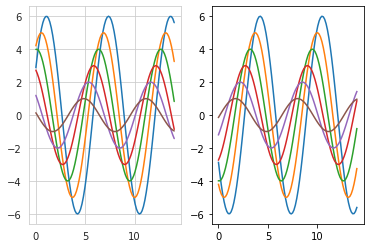

In [26]:
f = plt.figure()
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

It is generally better to stick to one style for all your plots in an analysis, so I usually just set the style globally (usually at the top of my notebook right after I import seaborn)

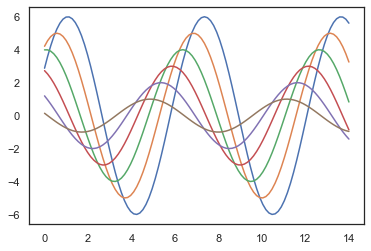

In [27]:
sns.set(style='white')
sinplot()

I also don't like the box all the way around my plot so I also do what is called despining it

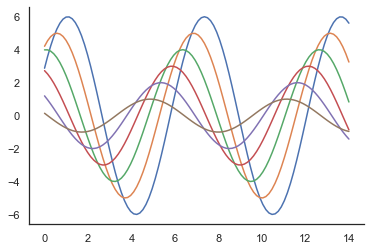

In [28]:
sinplot()
sns.despine()

If you want to do that default for all plots just add this to the top of your notebook as well 

`plt.rc("axes.spines", top=False, right=False)`

One other aesthetic change I make is the font size/scaling. One of the most common issues I see in plots in presentations is that presenters do not change the font sizes of the text in the plots from the default so it is difficult to read them. Even when just sharing plots with your PIs and labmates they will appreciate if you include plots with legible axes. While there is no silver bullet for this I do put this line of code at the top of my notebooks to at least make my initial plots close to usable

`sns.set(font_scale=1.25)`

Ultimately this is what the top of my imports cell looks like with regards to plotting


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("axes.spines", top=False, right=False)
sns.set(style='white', font_scale=1.25)

%matplotlib inline

#### Color

Color is one of the easiest things in plotting to mess up. 

One of the first things you need to consider is how many colors you need. The more colors you have the harder the plot will be to interpret because colors will be closer together on the color wheel and less distinguishable. 

For example figure C in this plot has a lot of colors and makes it hard to distinguish them, but the authors of this paper numbered each color and put the numbers on the plot. Without the numbers it would be impossible to match the colors in the figure with the colors in the legend 

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-019-0933-9/MediaObjects/41586_2019_933_Fig1_HTML.png?as=webp" width=500 />

> An aside: the plots above are from scRNAseq of developing mouse embryos


Another important thing to consider is being **colorblind friendly**. After creating plots you can always check using a [website](https://www.color-blindness.com/coblis-color-blindness-simulator/) for different colorblindnesses. But you can also just change the settings on seaborn using `sns.set_pallete('colorblind')`

The last important thing to consider is that there are different types of colormaps/palettes for different types of data.

The first type is **categorical or qualitative**. These colors are unordered and good for when you have groups

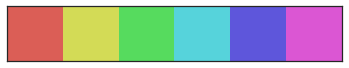

In [30]:
sns.palplot(sns.hls_palette())

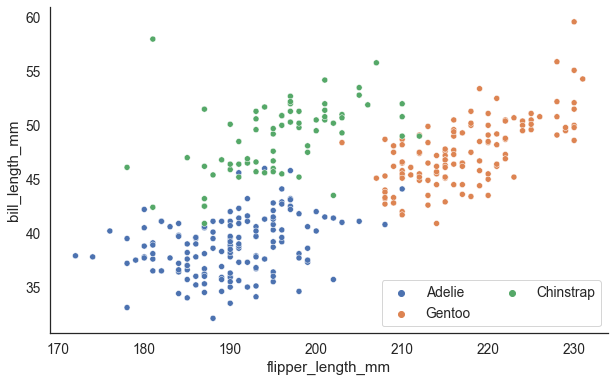

In [31]:
fig, ax =plt.subplots(figsize=(10,6))
sns.scatterplot(data=penguins,x='flipper_length_mm',y='bill_length_mm',hue='species',ax=ax)
ax.legend(ncol=2)
sns.despine()

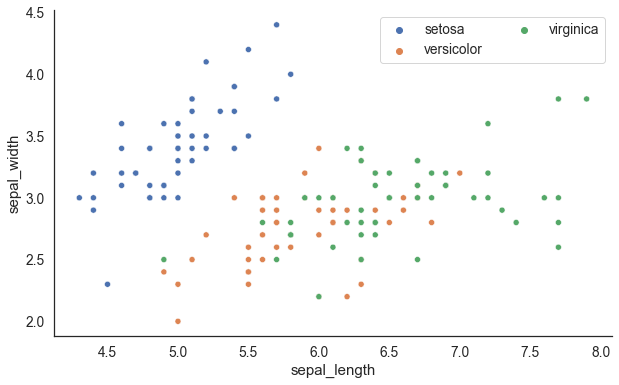

In [32]:
#plot with the iris dataset
fig, ax =plt.subplots(figsize=(10,6))
sns.scatterplot(data=iris,x='sepal_length',y='sepal_width',hue='species',ax=ax)
ax.legend(ncol=2)
sns.despine()

The next type is **sequential or monotonic** These are used for numerical changes or gradients

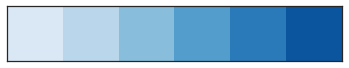

In [33]:
sns.palplot(sns.color_palette("Blues"))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


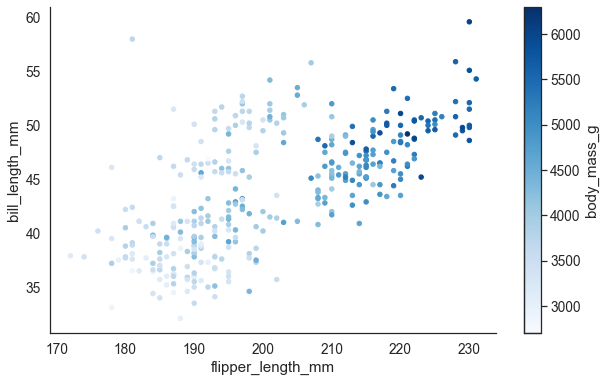

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
penguins.plot.scatter(x='flipper_length_mm',y='bill_length_mm',c='body_mass_g',cmap='Blues',ax=ax)
sns.despine()
plt.show()

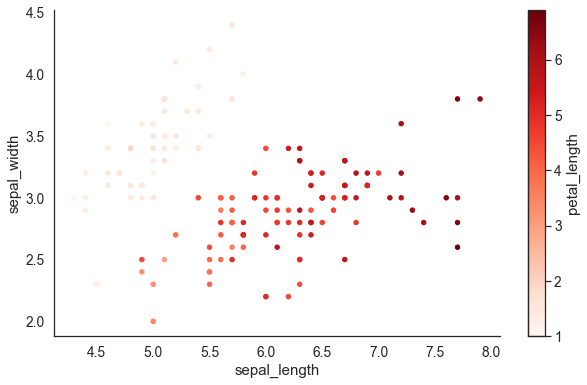

In [35]:
#plot with iris dataset
fig, ax = plt.subplots(figsize=(10, 6))
iris.plot.scatter(x='sepal_length',y='sepal_width',c='petal_length',cmap='Reds',ax=ax)
sns.despine()
plt.show()

The final type is **divergent**. This is useful when you are plotting a numerical value that can distinguish two categories

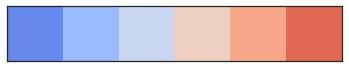

In [36]:
sns.palplot(sns.color_palette("coolwarm"))

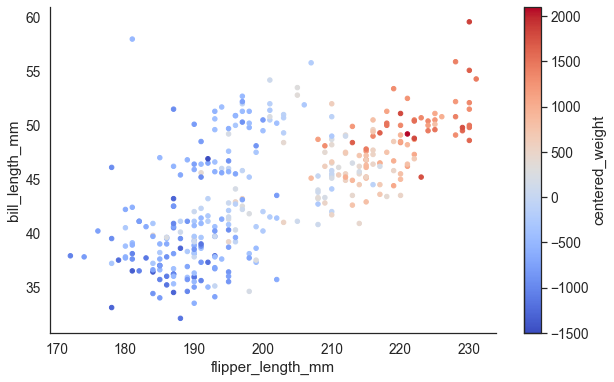

In [37]:
penguins['centered_weight'] = penguins['body_mass_g'] - np.mean(penguins['body_mass_g'])

fig, ax = plt.subplots(figsize=(10, 6))

penguins.plot.scatter(x='flipper_length_mm',y='bill_length_mm',c='centered_weight',cmap='coolwarm',ax=ax)
sns.despine()
plt.show()

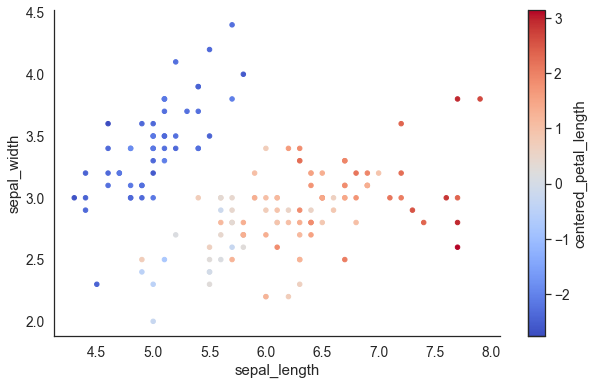

In [38]:
#plot with iris dataset
iris['centered_petal_length'] = iris['petal_length'] - np.mean(iris['petal_length'])

fig, ax = plt.subplots(figsize=(10, 6))
iris.plot.scatter(x='sepal_length',y='sepal_width',c='centered_petal_length',cmap='coolwarm',ax=ax)
sns.despine()
plt.show()

Like with the general plot aesthetics, it is highly encouraged that you be consistent with your palette choices.

#### Everything needs to be in columns

Every aspect of your plot needs to be in a column. 

Yes, this is the entire section, but it is such an important concept that it deserves a section of its own

#### Univariate/Categorical Plotting

There are many ways to plot the same categorical data. When selecting which method there are a few important questions you should be asking yourself

* Does the figure faithfully depict the data?
* Does the figure clearly display the result?
* Is the figure simple and easy to understand?

All 3 of the plots below display the same data. But some display if better than others

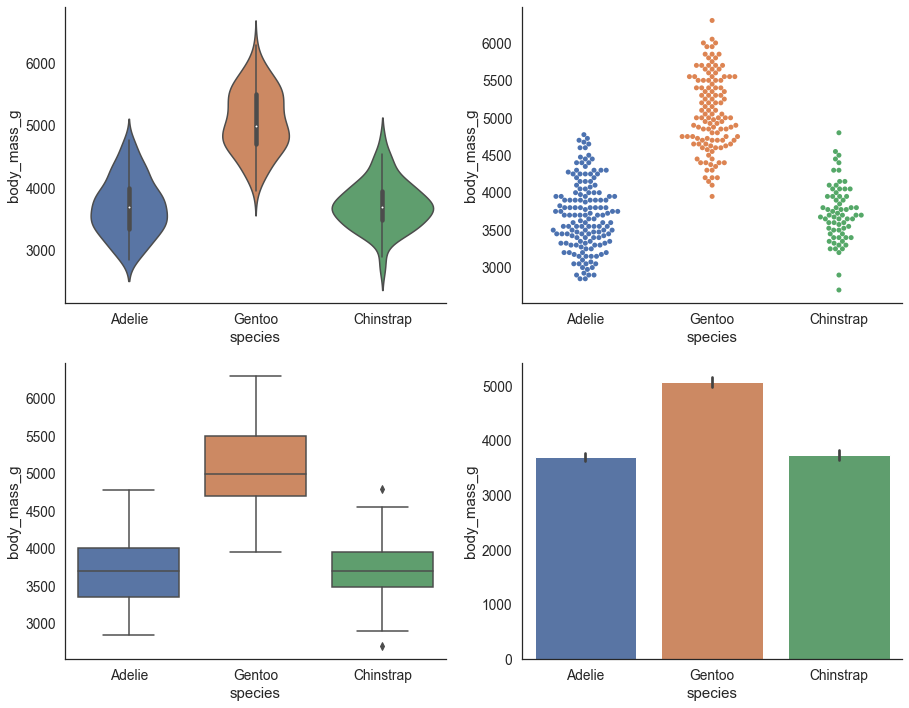

In [39]:
fig ,ax = plt.subplots(figsize=(15,12), ncols=2,nrows=2)
sns.violinplot(data=penguins,x='species',y='body_mass_g',ax=ax[0,0])
sns.swarmplot(data=penguins,x='species',y='body_mass_g',ax=ax[0,1])
sns.boxplot(data=penguins,x='species',y='body_mass_g',ax=ax[1,0])
sns.barplot(data=penguins,x='species',y='body_mass_g',ax=ax[1,1])

sns.despine()
plt.show()

In general, publishers will not even you publish a barplot like the bottom right one anymore. This clearly is not showing the data faithfully. 



<img src="./figure/xkcd_plot.jpeg" width=700/>




You can also stack multiple versions on top of each other to include more information.

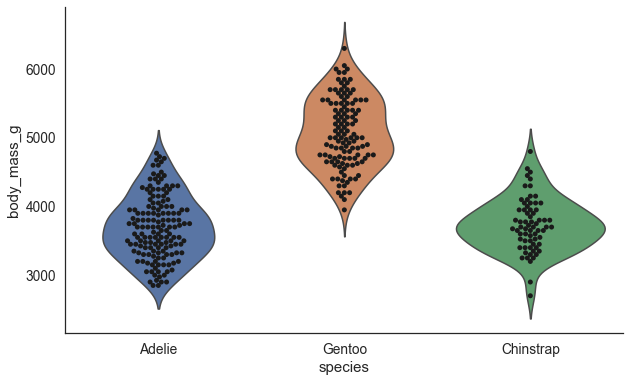

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(data=penguins,x='species',y='body_mass_g',ax=ax, color='k')
sns.violinplot(data=penguins,x='species',y='body_mass_g',ax=ax, saturation=.75, inner=None)
sns.despine()
plt.show()

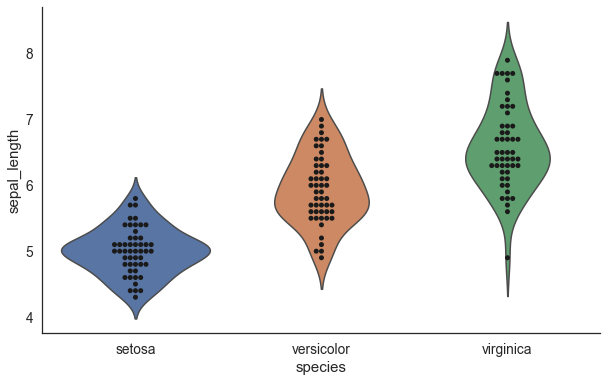

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(data=iris,x='species',y='sepal_length',ax=ax, color='k')
sns.violinplot(data=iris,x='species',y='sepal_length',ax=ax, saturation=.75, inner=None)
sns.despine()
plt.show()

Or you can stack according to species

In [42]:
df_melt = pd.melt(penguins,id_vars='species',
                  value_vars = ['bill_length_mm','bill_depth_mm'])

In [43]:
df_melt.head()

,species,variable,value
0,Adelie,bill_length_mm,39.1
1,Adelie,bill_length_mm,39.5
2,Adelie,bill_length_mm,40.3
3,Adelie,bill_length_mm,NaN
4,Adelie,bill_length_mm,36.7


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


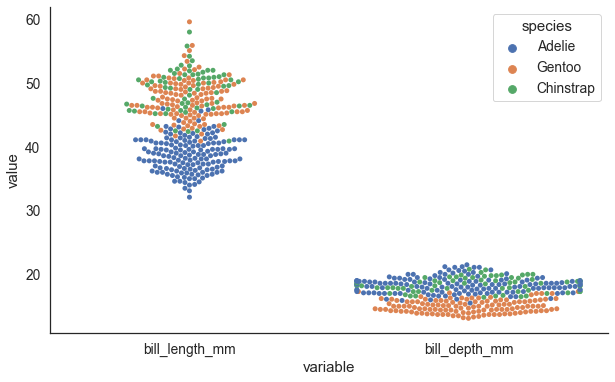

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(data=df_melt, x='variable',y='value',hue='species',ax=ax)
sns.despine()
plt.show()

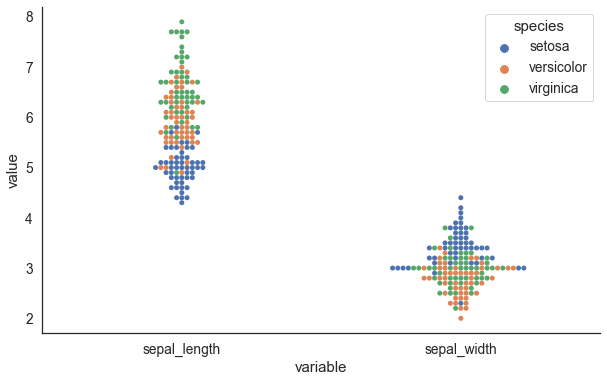

In [45]:
iris_melt = pd.melt(iris,id_vars='species',
                  value_vars = ['sepal_length','sepal_width'])
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(data=iris_melt, x='variable',y='value',hue='species',ax=ax)
sns.despine()
plt.show()

Obviously this isn't useful with them stacked on top of each other 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

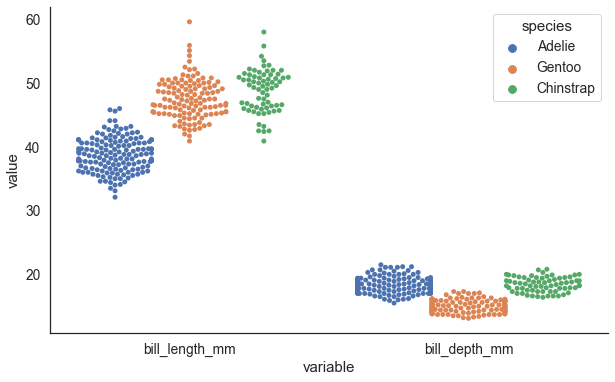

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.swarmplot(
    data=df_melt, x='variable', y='value', hue='species', ax=ax, dodge=True)
sns.despine()
plt.show()

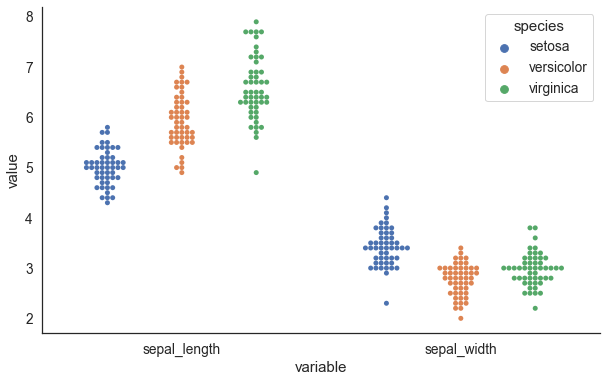

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.swarmplot(
    data=iris_melt, x='variable', y='value', hue='species', ax=ax, dodge=True)
sns.despine()
plt.show()

The last plot type is a histogram or KDE plot. These also display distributions

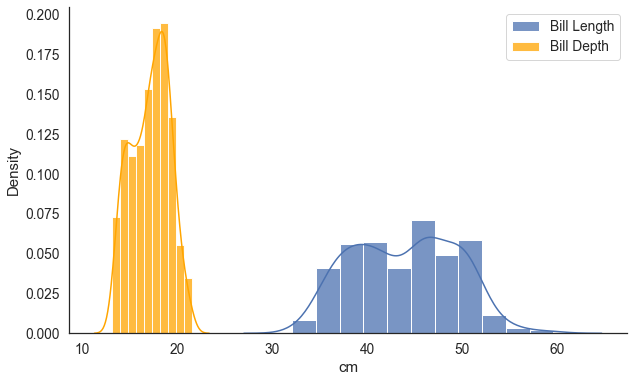

In [48]:
fig ,ax =plt.subplots(figsize=(10,6))
sns.histplot(penguins['bill_length_mm'],ax=ax, label='Bill Length',stat ='density')
sns.histplot(penguins['bill_depth_mm'],ax=ax, label='Bill Depth',stat ='density',color = 'orange')
sns.kdeplot(penguins['bill_length_mm'],ax=ax)
sns.kdeplot(penguins['bill_depth_mm'],ax=ax, color = 'orange')
ax.legend()
sns.despine()
ax.set(xlabel='cm')
plt.show()

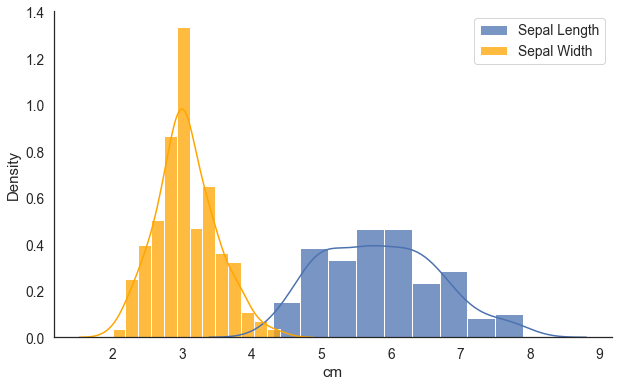

In [49]:
fig ,ax =plt.subplots(figsize=(10,6))
sns.histplot(iris['sepal_length'],ax=ax, label='Sepal Length',stat ='density')
sns.histplot(iris['sepal_width'],ax=ax, label='Sepal Width',stat ='density',color = 'orange')
sns.kdeplot(iris['sepal_length'],ax=ax)
sns.kdeplot(iris['sepal_width'],ax=ax, color = 'orange')
ax.legend()
sns.despine()
ax.set(xlabel='cm')
plt.show()

Notice how the y axis scale is not in counts, like a histogram, that is because the Density plot is normalized so it also normalizes the histogram.

If you'd prefer to have counts in the y axis you can remove the KDE plot

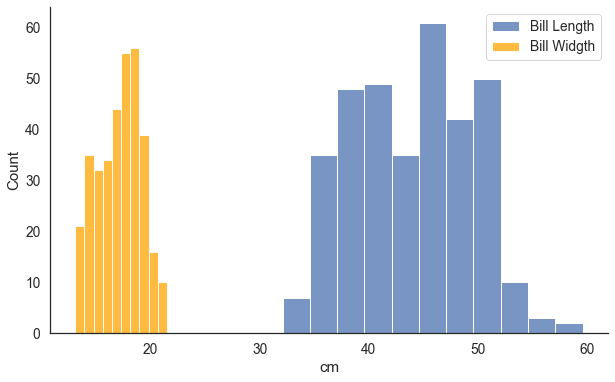

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    penguins['bill_length_mm'],
    ax=ax,
    label='Bill Length',
    )
sns.histplot(
    penguins['bill_depth_mm'], ax=ax, label='Bill Widgth',color = 'orange')
ax.legend()
sns.despine()
ax.set(xlabel='cm')
plt.show()

In general, histograms will display the data more faithfully, but KDE plots can be useful when you want to display a lot of distributions on top of each other

#### Multivariate plotting

With multivariate plots you are comparing numerical data on two axis. There's also a lot of other things you can add to add information to the plots.


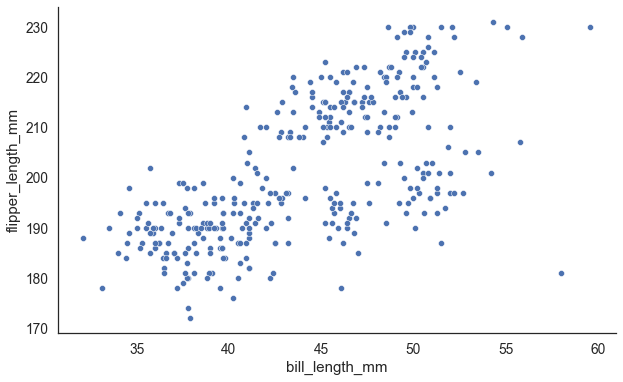

In [51]:
fig ,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=penguins,x='bill_length_mm',y='flipper_length_mm',ax=ax)
sns.despine()

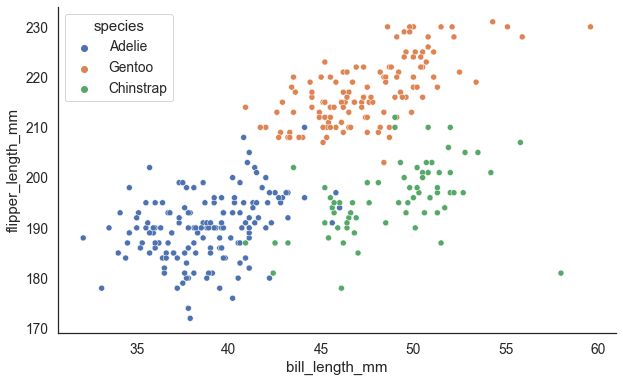

In [52]:
fig ,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=penguins,x='bill_length_mm',y='flipper_length_mm', hue='species')
sns.despine()

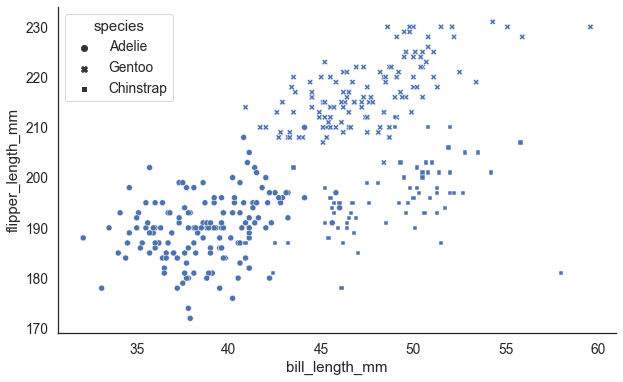

In [53]:
fig ,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=penguins,x='bill_length_mm',y='flipper_length_mm',ax=ax,style='species')
sns.despine()

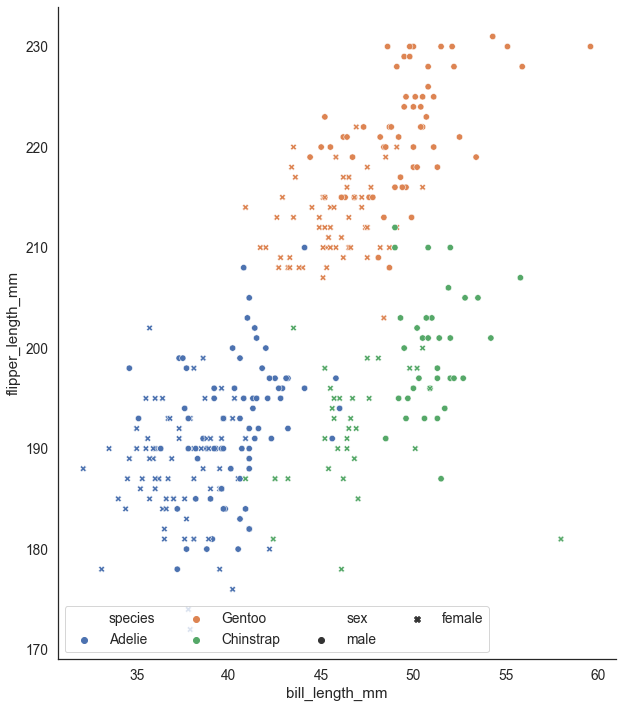

In [54]:
fig, ax = plt.subplots(figsize=(10, 12))
sns.scatterplot(data=penguins,
    x='bill_length_mm',
    y='flipper_length_mm',
    ax=ax,
    hue='species',
    style='sex',
    s=40)
ax.legend(ncol=4)
sns.despine()

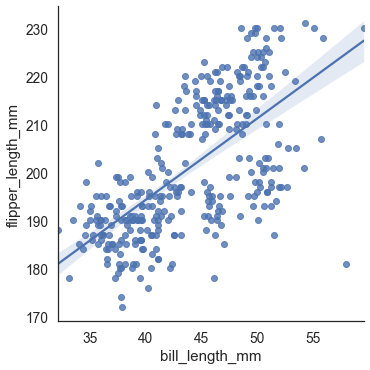

In [55]:
sns.lmplot(data=penguins,x='bill_length_mm',y='flipper_length_mm')
plt.show()

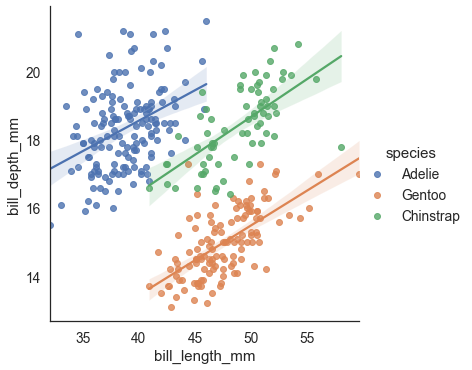

In [135]:
sns.lmplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    hue_order=['Adelie','Gentoo', 'Chinstrap'])
plt.show()

In [60]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

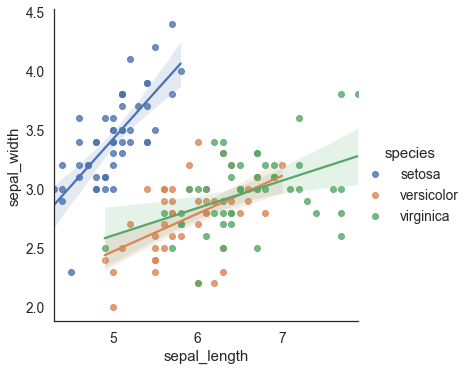

In [61]:

sns.lmplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    hue_order=['setosa','versicolor','virginica'])
plt.show()

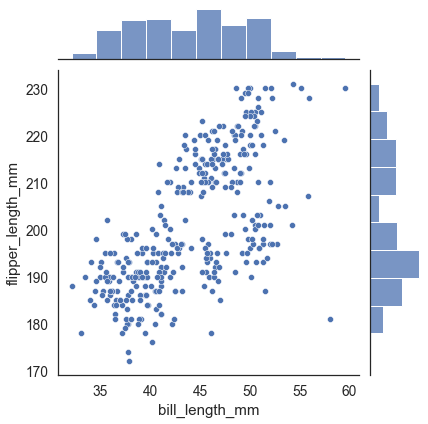

In [62]:
sns.jointplot(data=penguins,x='bill_length_mm',
    y='flipper_length_mm')

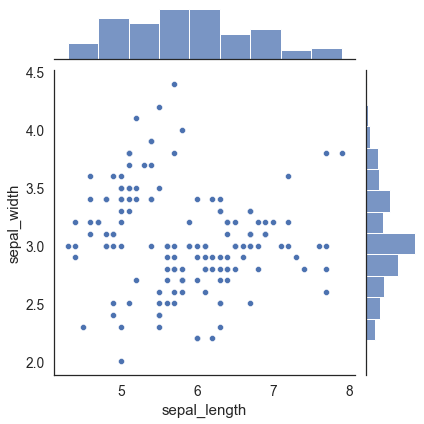

In [63]:
sns.jointplot(data=iris,x='sepal_length',
    y='sepal_width')

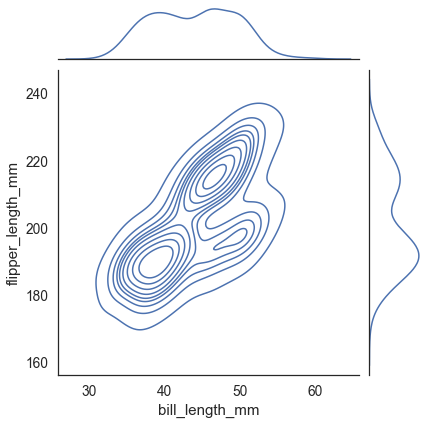

In [141]:
sns.jointplot(data=penguins,x='bill_length_mm',y='flipper_length_mm',kind='kde')
plt.show()

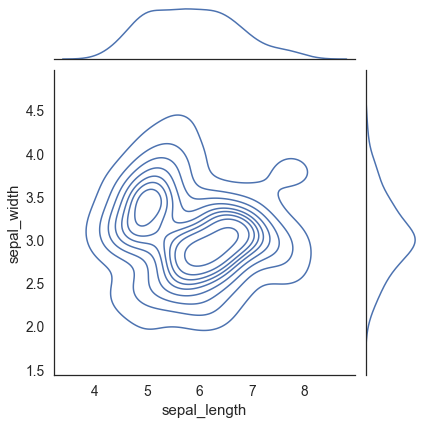

In [64]:
sns.jointplot(data=iris,x='sepal_length',y='sepal_width',kind='kde')
plt.show()

In [142]:
!wget https://raw.githubusercontent.com/bharris12/URP_2021_Programming_Course/main/lecture_4/data/example_expression.csv
expression_demo = pd.read_csv('./example_expression.csv', index_col=0)
corr_network = pd.DataFrame(
    np.corrcoef(expression_demo.values.T),
    index=expression_demo.columns,
    columns=expression_demo.columns)
corr_network.index.name = 'Genes'
corr_network.columns.name = 'Genes'

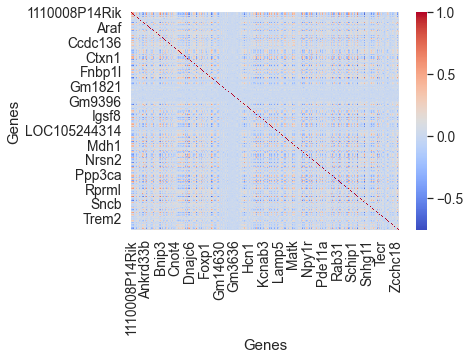

In [143]:
sns.heatmap(corr_network, cmap='coolwarm')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


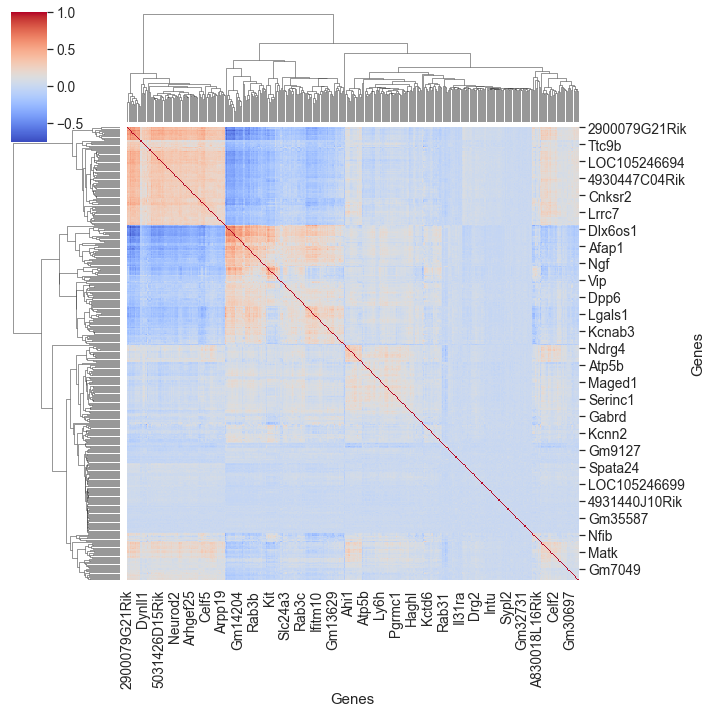

In [144]:
sns.clustermap(corr_network, cmap='coolwarm')
plt.show()

# Extra Resources

### Edward Tufte

Edward Tufte is an extremely popular resource for plotting guidelines. Some of his points may seem absurd/a pain to implement in code. But his general philosophy for plotting quantitative data is to make the plots as minimalist and clear as possible. He has multiple books and offers paid in person courses. 

https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130


https://www.edwardtufte.com/tufte/

### Advanced python libraries

#### Bokeh

Bokeh is an interactive plotting library. It is especially useful for making websites. It uses a slightly different grammar than matplotlib. 

https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html#userguide-quickstart



In [65]:
# Might need to do
# $ conda install -c bokeh bokeh or
# $ pip install bokeh in the terminal for this cell to work

from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_notebook()
# create a new plot
p = figure(
    tools="pan,box_zoom,reset,save",
    y_axis_type="log",
    y_range=[0.001, 10**11],
    title="log axis example",
    x_axis_label='sections',
    y_axis_label='particles')

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")
output_file
# show the results
show(p)

ModuleNotFoundError: No module named 'bokeh'

These plots are not great for publication necessarily because a lot of the features for it are centered around being interactive. One nice thing about it is that it is free


#### Plotly

Plotly is a freemium software package. It is very similar to bokeh, but actually runs on the plotly company server. You need to make an account and need to be connected to the internet to use. Additionally, you are limited in what you can do and the amount of plots you can make with a free account.

https://plot.ly/python/

### Non Python Plotting Resources

Interactive:
    
1. [Tableau](https://www.tableau.com)
    
2. [Graph Pad](https://www.graphpad.com)

3. Excel (Don't use, very limited options)
    
    
Programming:
    
1. R 
    1. base graphics
    2. [ggplot2](https://ggplot2.tidyverse.org/reference/ggplot.html)
2. Javascript
    1. [D3](https://d3js.org) Very powerful and customizable 